## Костыра Екатерина ПМ_1901

# Занятие 10. Проект построения простой модели машинного обучения

Веберите любые данные для задачи классификации из репозитория данных для машинного обучения (UCI Machine learning repository: http://archive.ics.uci.edu/ml/index.php) или возьмите свои данные и постройте простую модель машинного обучения в соответствии с приведенной ниже схемой. Комментарии к каждому разделу обязательны.

Цель набора данных - диагностически предсказать, есть ли у пациента диабет, на основе определенных диагностических измерений, включенных в набор данных.

Наборы данных состоят из нескольких медицинских предикторов (независимых) и одной целевой (зависимой) переменной, результата . Независимые переменные включают количество беременностей у пациентки, их ИМТ, уровень инсулина, возраст и т. Д.

#### Информация об атрибутах:
1. preg - Количество беременных
2. plas - Глюкоза
3. pres - Кровяное давление (мм рт. Ст.)
4. skin - Толщина кожи (мм)
5. test - Инсулин
6. mass - Индекс массы тела (вес в кг / (рост в м) ^ 2)
7. pedi - Сахарный диабет
8. age - Возраст (лет)
9. class - Исход (Переменная класса (0, если не диабет, 1, если диабет) 268 из 768 равны 1, остальные равны 0)

### 1. Loading the libraries and the dataset

In [10]:
# Load libraries
import pandas as pd
import numpy as np
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [11]:
import os
os.chdir("C:/Users/79811/anaconda3/")

In [12]:
# Load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataset = read_csv(filename, names=names)

### 2. Summarizing the dataset

Посмотрим на размерность данных:

In [13]:
# shape
print(dataset.shape)

(768, 9)


Получаем, что данные состоят из 768 строк и 9 столбцов

In [28]:
# head
print(dataset.head(20))

    preg  plas  pres  skin  test  mass   pedi  age  class
0      6   148    72    35     0  33.6  0.627   50      1
1      1    85    66    29     0  26.6  0.351   31      0
2      8   183    64     0     0  23.3  0.672   32      1
3      1    89    66    23    94  28.1  0.167   21      0
4      0   137    40    35   168  43.1  2.288   33      1
5      5   116    74     0     0  25.6  0.201   30      0
6      3    78    50    32    88  31.0  0.248   26      1
7     10   115     0     0     0  35.3  0.134   29      0
8      2   197    70    45   543  30.5  0.158   53      1
9      8   125    96     0     0   0.0  0.232   54      1
10     4   110    92     0     0  37.6  0.191   30      0
11    10   168    74     0     0  38.0  0.537   34      1
12    10   139    80     0     0  27.1  1.441   57      0
13     1   189    60    23   846  30.1  0.398   59      1
14     5   166    72    19   175  25.8  0.587   51      1
15     7   100     0     0     0  30.0  0.484   32      1
16     0   118

Посмотрим на описательные статистики данных

In [15]:
# descriptions
print(dataset.describe())

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

In [16]:
# class distribution
print(dataset.groupby('class').size())

class
0    500
1    268
dtype: int64


Таким образом, по результатам мы видим, что данные по классам распределены неравномерно. Мы получили, что 500 человек являются здоровыми, а у 268 присутсвует заболевание

### 3. Visualizing the dataset

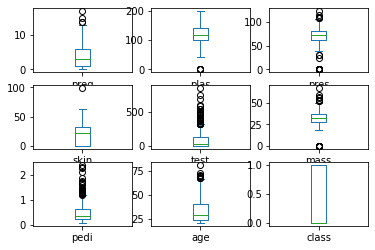

In [17]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
pyplot.show()

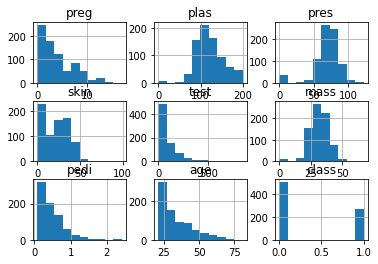

In [40]:
# histograms
dataset.hist()
pyplot.show()

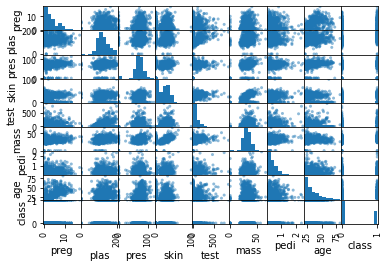

In [41]:
# scatter plot matrix
scatter_matrix(dataset)
pyplot.show()

### 4. Evaluating some algorithms

Разделим наборы данных для проверки:

In [18]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

Теперь проверим данные на выборочных алгоритмах:

In [19]:
# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.477076 (0.060028)
LDA: 0.472210 (0.062791)
KNN: 0.446060 (0.060575)
CART: 0.350132 (0.051330)
NB: 0.359836 (0.077503)
SVM: 0.490111 (0.052669)


По результатам видим:

Средняя оценка точности LR равна 48%, а стандартное отклонение 6%


Средняя оценка точности  LDA равна 47%, а стандартное отклонение 6%


Средняя оценка точности  KNN равна 47%, а стандартное отклонение 6%


Средняя оценка точности  CART равна 35%, а стандартное отклонение 5%


Средняя оценка точности  NB равна 36%, а стандартное отклонение 8%


Средняя оценка точности  SVM равна 49%, а стандартное отклонение 5%

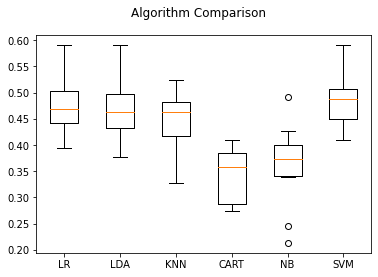

In [44]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

Ящичковая диаграмма - это метод графического изображения групп числовых данных через их квартили. Такой вид диаграммы в удобной форме показывает медиану (или, если нужно, среднее), нижний и верхний квартили, минимальное и максимальное значение выборки и выбросы.Расстояния между различными частями ящика позволяют определить степень разброса (дисперсии) и асимметрии данных и выявить выбросы.

По результатам видим, что с точностью в 49% лучше всего работает алгоритм SVM (Метод опорных векторов), но также хороши методы LR (Логистическая регрессия) и LDA (Линейный дискриминантный анализ), а хуже всего метод CART

### 5. Making some predictions

In [20]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.461038961038961
[[70  0  1 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 1  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
              precision    recall  f1-score   support

         0.0       0.56      0.96      0.71        73
        18.0       0.00      0.00      0.00         0
        22.0       0.00      0.00      0.00         0
        23.0       0.00      0.00      0.00         0
        25.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         1
        36.0       0.00      0.00      0.00         2
        37.0       0.00      0.00      0.00         0
        43.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        49.0       0.00      0.00      0.00         0
        50.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         0
        53.0   

C:\Users\79811\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\79811\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\79811\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\79811\anaconda3\lib\site-packages\sklearn\metrics\_cla

Точность того, сколько всего результатов было предсказано верно, составляет 46%

### Матрица ошибок

   Матрица ошибок представляет собой инструмент, использующий кросс-табуляцию для показа того, как соотносятся значения совпадающих классов, полученные из различных источников. Другими словами это таблица с 4 различными комбинациями прогнозируемых и фактических значений. Прогнозируемые значения описываются как положительные и отрицательные, а фактические – как истинные и ложные.

Рассмотрим главную диагональ, на которой находятся правильные предсказания: 

1. True Positive (истинно-положительное решение): прогноз совпал с реальностью, результат положительный произошел, как и было предсказано ML-моделью


2. True Negative (истинно-отрицательное решение): результат отрицательный, ML-прогноз совпал с реальностью

Рассмотрим побочную диагональ, на которой находятся неверные предсказания:

3. False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала отрицательный результат, но на самом деле он положительный


4. False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала положительный результат, а на самом деле он отрицательный

### Classification Report

1. Точностью (precision) называется доля правильных ответов модели в пределах класса — это доля объектов действительно принадлежащих данному классу относительно всех объектов которые система отнесла к этому классу.


2. Полнота (recall) — это доля истинно положительных классификаций. Полнота показывает, какую долю объектов, реально относящихся к положительному классу, мы предсказали верно.


3. F-мера представляет собой гармоническое среднее между точностью (precision) и полнотой(recall). Она стремится к нулю, если точность или полнота стремится к нулю.


4. Support - количество встречаемости данного класса в наборе данных


5. Accuracy — доля правильных ответов алгоритма